In [6]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import corner
import batman
import emcee
import time
from multiprocessing import Pool
from IPython.display import display, Math
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as tck

from exotic_ld import StellarLimbDarkening

import pandas as pd
import pickle

import celerite2
from celerite2 import terms

In [7]:
TIC = 'TIC 66818296' #WASP-17 / TIC 66818296

search_result = lk.search_lightcurve(
    target=TIC,
    mission='TESS', author='SPOC')
print("trying to download")
lc_collection = search_result.download_all()
WASP_17b_lc_sector_12 = lc_collection[0].remove_nans()
WASP_17b_lc_sector_38 = lc_collection[1].remove_nans()
print("Search done")
print(lc_collection)
lc = lc_collection.stitch(corrector_func=lambda x: x.
                          remove_nans().normalize(unit='unscaled'))
#Sector 12 and sector 38
WASP_17b_lc = lc.remove_nans()

trying to download
Search done
LightCurveCollection of 2 objects:
    0: <TessLightCurve LABEL="TIC 66818296" SECTOR=12 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 66818296" SECTOR=38 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>


In [8]:
TIC = 'TIC 181949561' #WASP-39b / TIC 181949561

search_result = lk.search_lightcurve(
    target=TIC,
    mission='TESS', author='SPOC')
print("trying to download")
lc_collection = search_result.download_all()
print("Search done")
print(lc_collection)
lc = lc_collection.stitch(corrector_func=lambda x: x.
                          remove_nans().normalize(unit='unscaled'))

WASP_39b_lc = lc.remove_nans()

trying to download
Search done
LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 181949561" SECTOR=51 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>


In [9]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\WASP_17b\gp_batman_model\WASP_17b_model_flux_sigma.p"

with open(filename, "rb") as f:
    WASP_17b_model_flux, sigma = pickle.load(f)
f.close()

In [10]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\WASP_39b\gp_batman_model\WASP_39b_model_flux.p"

with open(filename, "rb") as f:
    WASP_39b_model_flux = pickle.load(f)
f.close()

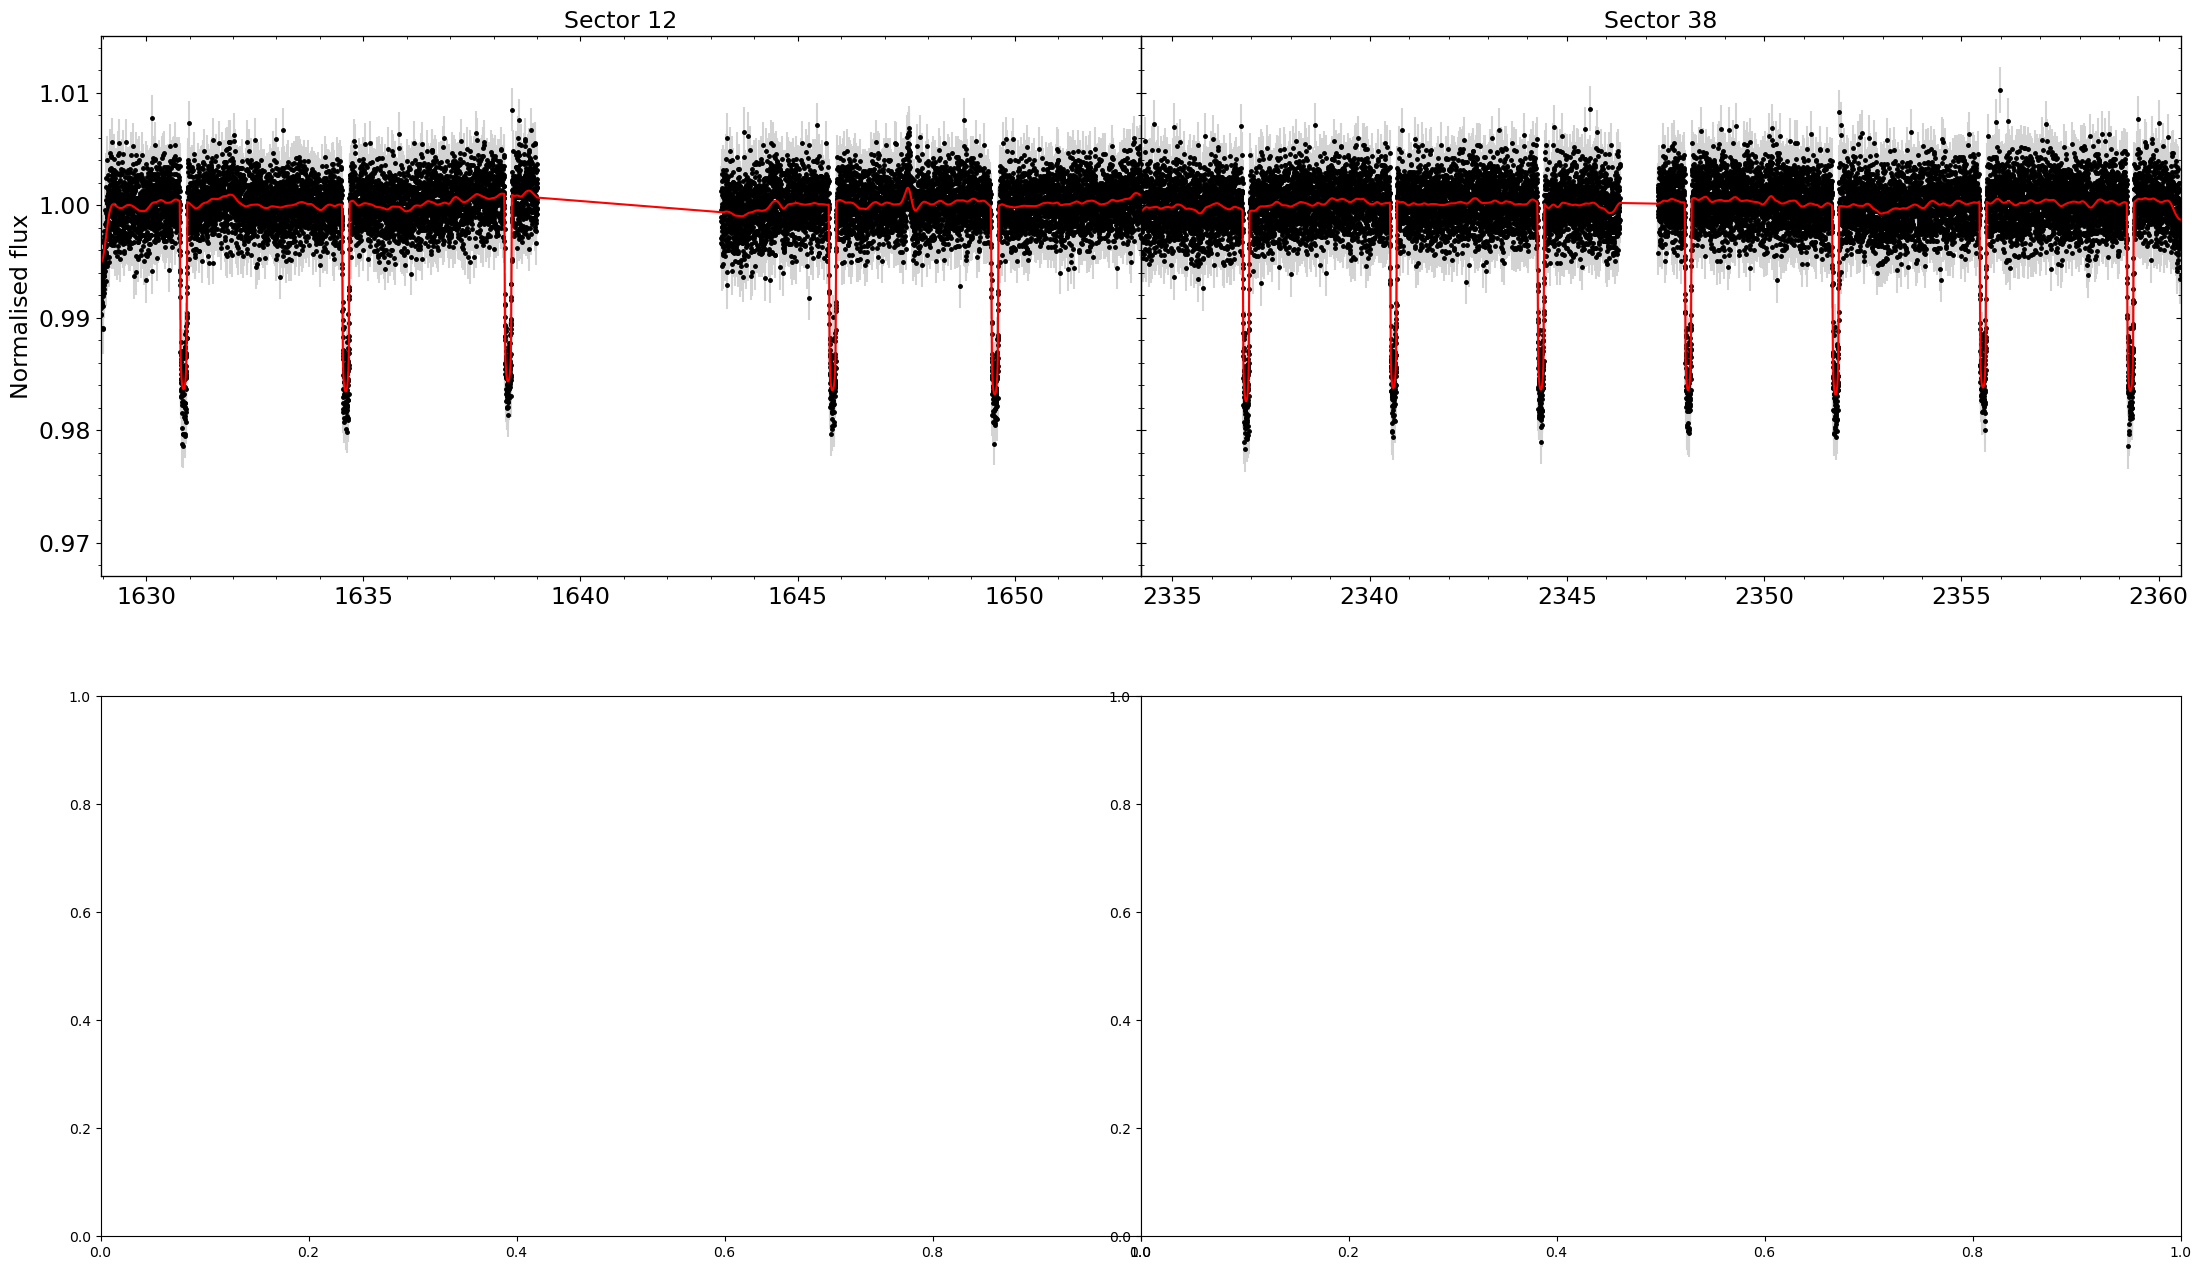

In [36]:
#Physical model only
#Panel settings
left = 0.1
bottom = 0.1
width = 0.65
height = 0.9
spacing = -height -1.1

rect1 = [left, bottom, width, height]
rect2 = [left+width, bottom, width, height]
rect3 = [left, bottom+height+spacing, width, height]
rect4 = [left+width, bottom+height+spacing, width, height]


fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_axes(rect1)
ax2 = fig.add_axes(rect2)

ax3 = fig.add_axes(rect3)
ax4 = fig.add_axes(rect4)

"""
WASP-17b Sector 12
"""
ax1.set_title("Sector 12", size=17)
ax1.errorbar(np.array(WASP_17b_lc.time.btjd), np.array(WASP_17b_lc.flux), yerr=np.array(WASP_17b_lc.flux_err), fmt='.', markersize=5, color='black', ecolor='LightGrey', label="Data", zorder=0) #Black
ax1.plot(np.array(WASP_17b_lc.time.btjd), WASP_17b_model_flux, color='Red', zorder=10)
ax1.set_xlim(min(WASP_17b_lc_sector_12.time.btjd), max(WASP_17b_lc_sector_12.time.btjd))

ax1.set_ylim([0.967, 1.015])

# Mirror y
ax1y = ax1.twinx()
ax1y.set_ylim(ax1.get_ylim())
ax1y.get_yaxis().set_ticklabels([])
ax1y.tick_params(which="both", direction="in")#, labelright=True, labelleft=True)

# Mirror x
ax1x = ax1.twiny()
ax1x.set_xlim(ax1.get_xlim())
ax1x.get_xaxis().set_ticklabels([])
ax1x.tick_params(which="both", direction="in")


"""
WASP-17b Sector 38
"""
ax2.set_title("Sector 38", size=17)
ax2.errorbar(np.array(WASP_17b_lc.time.btjd), np.array(WASP_17b_lc.flux), yerr=np.array(WASP_17b_lc.flux_err), fmt='.', markersize=5, color='black', ecolor='LightGrey', label="Data", zorder=0) #Black
ax2.plot(np.array(WASP_17b_lc.time.btjd), WASP_17b_model_flux, color='Red', zorder=10)
ax2.set_xlim(min(WASP_17b_lc_sector_38.time.btjd), max(WASP_17b_lc_sector_38.time.btjd))
ax2.set_ylim(ax1.get_ylim()) #Mirror ax1 ylims

ax2.get_yaxis().set_ticklabels([])
ax2.tick_params(axis="y",which="both", direction="in")

# Mirror y
ax2y = ax2.twinx()
ax2y.set_ylim(ax2.get_ylim())
ax2y.get_yaxis().set_ticklabels([])
ax2y.tick_params(which="both", direction="in")

# Mirror x
ax2x = ax2.twiny()
ax2x.set_xlim(ax2.get_xlim())
ax2x.get_xaxis().set_ticklabels([])
ax2x.tick_params(which="both", direction="in")



ax1.set_ylabel("Normalised flux", size=17)

ax1.yaxis.set_tick_params(labelsize=17)
ax1.xaxis.set_tick_params(labelsize=17)
ax2.xaxis.set_tick_params(labelsize=17)


ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1x.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax1y.yaxis.set_minor_locator(tck.AutoMinorLocator())


ax2.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax2x.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax2.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax2y.yaxis.set_minor_locator(tck.AutoMinorLocator())

"""
WASP-39b
"""

plt.show()